## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [75]:
# Combine the data into a single dataset
data_combination = mouse_metadata.merge(study_results, on='Mouse ID', how='left')

# Display the data table for preview
data_combination.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# Combine the data into a single dataset
data_combination = mouse_metadata.join(study_results, on='Mouse ID', how='outer')
 pd.merge(['mouse_metadata', 'study_results', on='Mouse ID', how='outer'])
filenames = ['mouse_metadata_path', 'study_results_path']
data_combination = mouse_metadata.append(study_results)
pd.merge([mouse_metadata, study_results

drop_dup_mouse_id = clinical_trial_df.loc[clinical_trial_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_clinical_trial_df = clinical_trial_df[clinical_trial_df['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_mouse_df = mouse_drug_df[mouse_drug_df['Mouse ID'].isin(drop_dup_mouse_id)==False]
          
 duplicate_mice = study_results.loc[study_results.duplicates(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mice.head()       

In [9]:
data_combination.shape

(1893, 8)

In [34]:
#checking the number of mice
data_combination.duplicated().sum()

1

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_combination.duplicated(['Mouse ID', 'Timepoint']).sum()

5

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
data_combination.duplicated(['Mouse ID'])

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = data_combination.drop_duplicates(['Mouse ID'])
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [61]:
# Checking the number of mice in the clean DataFrame.
clean_mice.duplicated(['Mouse ID']).sum()

0

## Summary Statistics

In [211]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = data_combination.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method produces everything in a single groupby function
summarystats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summarystats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [82]:
# data to appear to the bar gragh to be generated
datapoint_plot = data_combination.groupby(["Drug Regimen"]).count()["Mouse ID"]
datapoint_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

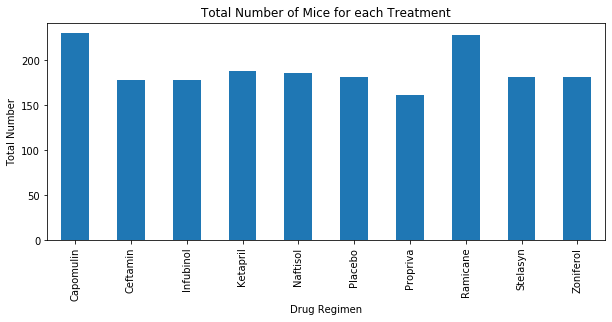

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
datapoint_plot.plot(kind="bar", figsize=(10,4))

#set chart title
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")

#show chart and set layout
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.legend(*args, **kwargs)>

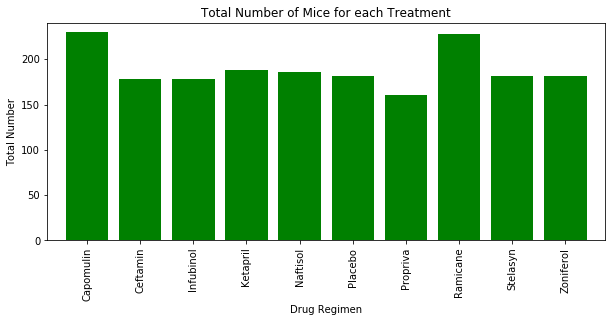

In [122]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x-axis and tick locations
x_axis = np.arange(len(datapoint_plot))
tick_locations = [value for value in x_axis]

# Defining data to be generated
plt.figure(figsize=(10,4))
plt.bar(x_axis, datapoint_plot, color='g', alpha=1, align='center')
plt.xticks(tick_locations, datapoint_plot.index.values, rotation="vertical")

# Setting x and y limit
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(datapoint_plot)+10)

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.legend

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = data_combination.groupby(["Sex"]).count()["Mouse ID"]
sex_distribution

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

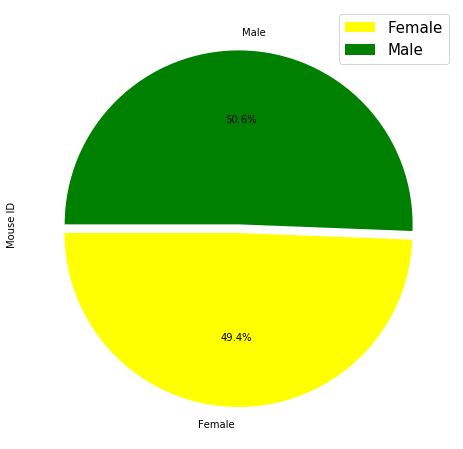

In [193]:
# Pie plot generation

colors = ['yellow', 'green']
explode = (0.05, 0)
panPie_plot = sex_distribution.plot.pie(y='Total Count',figsize=(8,8), colors = colors, startangle=180, explode = explode, autopct="%1.1f%%")
panPie_plot.legend(["Female", "Male"], prop={'size': 15})

Text(0.5, 1.0, 'Gender Distribution')

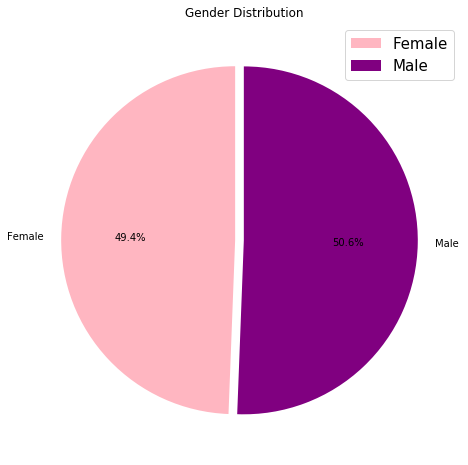

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Set the pie plot to be graphed
colors = ['lightpink', 'purple']
explode = (0.05, 0)
plt.pie(sex_distribution, explode=explode, labels=sex_distribution.index.values, colors=colors, autopct="%1.1f%%", startangle=90)
plt.legend(["Female", "Male"], prop={'size': 15})
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Gender Distribution')

## Quartiles, Outliers and Boxplots

In [234]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = data_combination[data_combination["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"], ascending=True)
mouse_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
both_dataframe = mouse_timepoint.merge(data_combination, on = ('Mouse ID', 'Timepoint'), how = 'left' )
both_dataframe
# Tumor volume at last timepoint
regimes_data = mouse_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [235]:
regimes_data.shape

(814, 4)

In [357]:
# Selecting individual row by index
capomulin_data = data_combination.loc[data_combination["Drug Regimen"] == "Capomulin",:]
ramicane_data = data_combination.loc[data_combination["Drug Regimen"] == "Ramicane", :]
infubinol_data = data_combination.loc[data_combination["Drug Regimen"] == "Infubinol", :]
ceftamin_data = data_combination.loc[data_combination["Drug Regimen"] == "Ceftamin", :]
capomulin_data

#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_last
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_vol
capomulin_merge = capomulin_vol.merge(data_combination, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol = capomulin_merge['Tumor Volume (mm3)']
quartiles = tuvol.quantile([0.25,0.5,0.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
print(f' IQR = {capomulin_iqr}')
print(f' Lower Quartile = {capomulin_lowerq}')
print(f' Upper Quartile = {capomulin_upperq}')
capomulin_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
capomulin_upper_bound = capomulin_upperq + 1.5*capomulin_iqr
print(f' Lower Bound: {capomulin_lower_bound}')
print(f' Upper Bound: {capomulin_upper_bound}')
capomulin_merge.describe()

print(f"Capomulin potential outliers could be values below {capomulin_lower_bound} and above {capomulin_upper_bound} could be outliers.")

 IQR = 7.781863460000004
 Lower Quartile = 32.37735684
 Upper Quartile = 40.1592203
 Lower Bound: 20.70456164999999
 Upper Bound: 51.83201549
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [358]:
#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_last = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_last
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_vol
ramicane_merge = ramicane_vol.merge(data_combination, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol_1 = ramicane_merge['Tumor Volume (mm3)']
quartiles = tuvol_1.quantile([0.25,0.5,0.75])
ramicane_lowerq = quartiles[0.25]
ramicane_upperq = quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
print(f' IQR = {ramicane_iqr}')
print(f' Lower Quartile = {ramicane_lowerq}')
print(f' Upper Quartile = {ramicane_upperq}')
ramicane_lower_bound = ramicane_lowerq - 1.5*ramicane_iqr
ramicane_upper_bound = ramicane_upperq + 1.5*ramicane_iqr
print(f' Lower Bound: {ramicane_lower_bound}')
print(f' Upper Bound: {ramicane_upper_bound}')
ramicane_merge.describe()

print(f"ramicane potential outliers could be values below {ramicane_lower_bound} and above {ramicane_upper_bound} could be outliers.")

 IQR = 9.098536719999998
 Lower Quartile = 31.56046955
 Upper Quartile = 40.65900627
 Lower Bound: 17.912664470000003
 Upper Bound: 54.30681135
ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [359]:
#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_last = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_last
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_vol
infubinol_merge = infubinol_vol.merge(data_combination, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol_2 = infubinol_merge['Tumor Volume (mm3)']
quartiles = tuvol_2.quantile([0.25,0.5,0.75])
infubinol_lowerq = quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
print(f' IQR = {infubinol_iqr}')
print(f' Lower Quartile = {infubinol_lowerq}')
print(f' Upper Quartile = {infubinol_upperq}')
infubinol_lower_bound = infubinol_lowerq - 1.5*infubinol_iqr
infubinol_upper_bound = infubinol_upperq + 1.5*infubinol_iqr
print(f' Lower Bound: {infubinol_lower_bound}')
print(f' Upper Bound: {infubinol_upper_bound}')
infubinol_merge.describe()

print(f"infubinol potential outliers could be values below {infubinol_lower_bound} and above {infubinol_upper_bound} could be outliers.")

 IQR = 11.477135160000003
 Lower Quartile = 54.04860769
 Upper Quartile = 65.52574285
 Lower Bound: 36.83290494999999
 Upper Bound: 82.74144559000001
infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [360]:
#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_last = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_last
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_vol
ceftamin_merge = ceftamin_vol.merge(data_combination, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tuvol_3 = ceftamin_merge['Tumor Volume (mm3)']
quartiles = tuvol_3.quantile([0.25,0.5,0.75])
ceftamin_lowerq = quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
print(f' IQR = {ceftamin_iqr}')
print(f' Lower Quartile = {ceftamin_lowerq}')
print(f' Upper Quartile = {ceftamin_upperq}')
ceftamin_lower_bound = ceftamin_lowerq - 1.5*ceftamin_iqr
ceftamin_upper_bound = ceftamin_upperq + 1.5*ceftamin_iqr
print(f' Lower Bound: {ceftamin_lower_bound}')
print(f' Upper Bound: {ceftamin_upper_bound}')
ceftamin_merge.describe()

print(f"ceftamin potential outliers could be values below {ceftamin_lower_bound} and above {ceftamin_upper_bound} could be outliers.")

 IQR = 15.577752179999997
 Lower Quartile = 48.72207785
 Upper Quartile = 64.29983003
 Lower Bound: 25.355449580000002
 Upper Bound: 87.66645829999999
ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


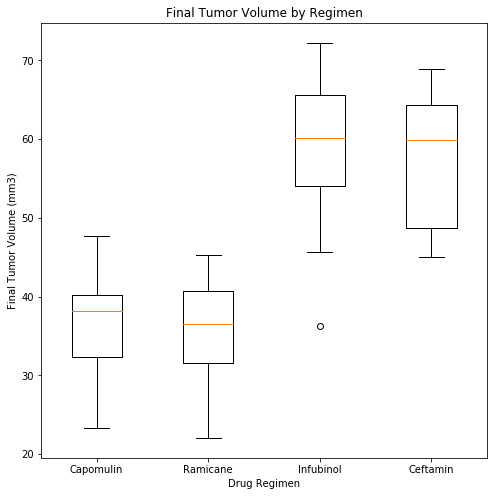

In [367]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_plot = [tuvol, tuvol_1, tuvol_2, tuvol_3]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(treatment_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

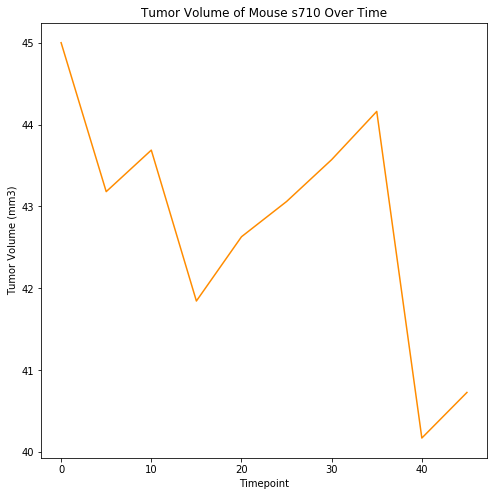

In [305]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot = data_combination.loc[(data_combination["Mouse ID"] == "s710")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "darkorange")
plt.title("Tumor Volume of Mouse s710 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

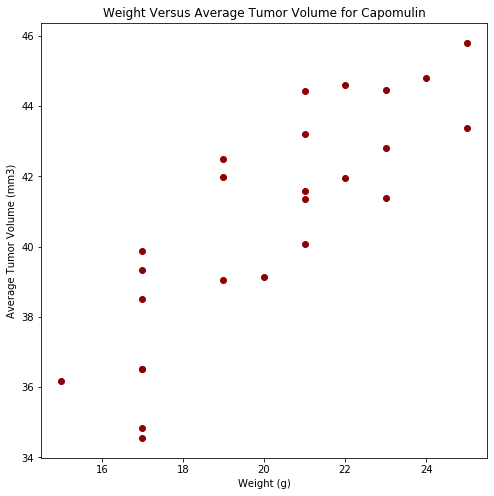

In [296]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot = data_combination.loc[(data_combination["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
scatter_plot_df

# set x and y value
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "darkred")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Versus Average Tumor Volume for Capomulin")

## Correlation and Regression

In [298]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f' The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_scatter_plot, volume_scatter_plot)[0],2)}') 

 The correlation coefficient between weight and tumor volume is 0.84


In [308]:
# Linear regression model
linear_representation = st.linregress(scatter_plot_df['Weight (g)'], scatter_plot_df['Tumor Volume (mm3)'])
linear_representation

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

<function matplotlib.pyplot.show(*args, **kw)>

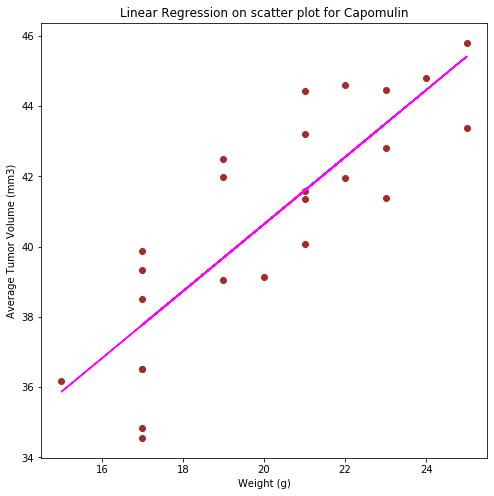

In [326]:
#Caluclate the linear regression model
slope, intercept, r_value , p_value, std_err = st.linregress(weight_scatter_plot, volume_scatter_plot)
y_value = slope * wt + intercept

#using prior computing data to plot the regression line on the scatter plot
scatter_plot = data_combination.loc[(data_combination["Drug Regimen"] == "Capomulin")]
scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "brown")
plt.plot(wt, y_value, color = "magenta")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression on scatter plot for Capomulin")
plt.show